In [46]:
import pandas as pd
data_frame = pd.read_csv('data.csv')

In [47]:
data_value = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = data_value['Wage'].replace('[€,]', '', regex=True).apply(value_to_float)
value = data_value['Value'].replace('[€,]', '', regex=True).apply(value_to_float)

data_value['Wage'] = wage
data_value['Value'] = value

data_value['Diff'] = data_value['Value'] - data_value['Wage']
data_value.sort_values('Diff', ascending=False)
print(data_value)


                     Name      Wage        Value         Diff
0                L. Messi  565000.0  110500000.0  109935000.0
1       Cristiano Ronaldo  405000.0   77000000.0   76595000.0
2               Neymar Jr  290000.0  118500000.0  118210000.0
3                  De Gea  260000.0   72000000.0   71740000.0
4            K. De Bruyne  355000.0  102000000.0  101645000.0
...                   ...       ...          ...          ...
18202        J. Lundstram    1000.0      60000.0      59000.0
18203  N. Christoffersson    1000.0      60000.0      59000.0
18204           B. Worman    1000.0      60000.0      59000.0
18205      D. Walker-Rice    1000.0      60000.0      59000.0
18206           G. Nugent    1000.0      60000.0      59000.0

[18207 rows x 4 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


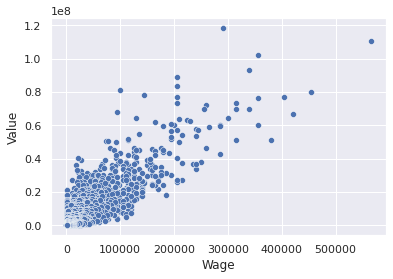

In [48]:
import seaborn as sns 
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=data_value)
print(graph)

In [52]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ('index', '$index'),
    ('(Wage,Value)', '(@Wage, @Value)'),
    ('Name', '@Name')]
)

p = figure(title='Soccer 2019', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=data_value)
show(p)